# Final Project Deep Learning and Reinforcement

## Importing Libraries

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Dell\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
from keras.utils import np_utils
import tensorflow
from tensorflow.keras import optimizers

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Importing data

In [4]:
data = pd.DataFrame()
main_path = ''
path_Ak = main_path + 'Ak'
path_Ala_Idris = main_path + 'Ala_Idris'
path_Buzgulu = main_path + 'Buzgulu'
path_Dimnit = main_path + 'Dimnit'
path_Nazli = main_path + 'Nazli'

data['images_name'] = os.listdir(path_Ak) + os.listdir(path_Ala_Idris) + os.listdir(path_Buzgulu) + os.listdir(path_Dimnit) + os.listdir(path_Nazli)

classes = []
paths = []
for image in data['images_name']:
    class_ = image.split(' (')[0]
    classes.append(class_)
    paths.append(main_path+class_+'/'+image)

data['classes'] = classes
data['path'] = paths
print(len(data))
data.head()

500


,images_name,classes,path
0,Ak (1).png,Ak,Ak/Ak (1).png
1,Ak (10).png,Ak,Ak/Ak (10).png
2,Ak (100).png,Ak,Ak/Ak (100).png
3,Ak (11).png,Ak,Ak/Ak (11).png
4,Ak (12).png,Ak,Ak/Ak (12).png


In [5]:
li = data.classes.unique()

li=list(li)


In [6]:
df = data.copy()
im = []
pic = []
label = []
INPUT_SIZE=64



for i in range(len(df)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']

    image=cv2.imread(p)
    image=Image.fromarray(image,'RGB')
    #resize the image
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    #append image arry in dataset list and its label in label list
    im.append(np.array(image))
    
    if c == 'Ak':
        cl = 0
        
    elif c == 'Ala_Idris':
        cl = 1
    elif c == 'Buzgulu':
        cl = 2
    elif c == 'Dimnit':
        cl = 3
    elif c == 'Nazli':
        cl = 4
    
    pic.append(image)
    label.append(cl)



In [7]:
dataset = im

print(type(im))
print(type(label))

dataset=np.array(dataset)
label=np.array(label)

print(type(dataset))
print(type(label))

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<ipython-input-8-4411c8e41d7f>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi = np.array(pic)
<ipython-input-8-4411c8e41d7f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi = np.array(pic)


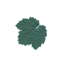

In [8]:
df['im_array']= im
df['label']=label
pi = np.array(pic)
df['pic']=pi
df.loc[1,'pic']

In [25]:
df.shape

(500, 6)

## Making x and y train/test

In [9]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)


(400, 64, 64, 3)
(400,)


### converting y to categorical format

In [10]:
num_classes = 5

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [11]:
now = datetime.datetime.now

# 1st Model

In [12]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                        

### Using optimizers RMSprop(lr=0.0005, decay=1e-6)

In [13]:
batch_size = 32

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)


# Let's train the model_1 using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

t= now()
model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

print('Training time: %s' % (now() - t))

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50


c:\Users\Dell\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


13/13 [==============================] - 1s 39ms/step - loss: 1.6192 - accuracy: 0.1875 - val_loss: 1.6175 - val_accuracy: 0.1400
Epoch 2/50
13/13 [==============================] - 0s 29ms/step - loss: 1.6102 - accuracy: 0.2175 - val_loss: 1.6226 - val_accuracy: 0.1000
Epoch 3/50
13/13 [==============================] - 0s 30ms/step - loss: 1.6053 - accuracy: 0.2300 - val_loss: 1.6263 - val_accuracy: 0.1400
Epoch 4/50
13/13 [==============================] - 0s 29ms/step - loss: 1.6014 - accuracy: 0.2050 - val_loss: 1.6108 - val_accuracy: 0.1700
Epoch 5/50
13/13 [==============================] - 0s 30ms/step - loss: 1.5994 - accuracy: 0.2700 - val_loss: 1.6106 - val_accuracy: 0.1500
Epoch 6/50
13/13 [==============================] - 0s 31ms/step - loss: 1.5807 - accuracy: 0.2850 - val_loss: 1.6010 - val_accuracy: 0.2900
Epoch 7/50
13/13 [==============================] - 0s 31ms/step - loss: 1.5736 - accuracy: 0.3075 - val_loss: 1.5865 - val_accuracy: 0.2200
Epoch 8/50
13/13 [======

### Using optimizers Adam(learning_rate=0.001)

In [14]:
batch_size = 32

# initiate RMSprop optimizer
# opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model_1 using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

t=now()

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

print('Training time: %s' % (now() - t))

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
13/13 [==============================] - 1s 40ms/step - loss: 0.4589 - accuracy: 0.8475 - val_loss: 1.4235 - val_accuracy: 0.4800
Epoch 2/50
13/13 [==============================] - 0s 32ms/step - loss: 0.3848 - accuracy: 0.8675 - val_loss: 1.4292 - val_accuracy: 0.5000
Epoch 3/50
13/13 [==============================] - 0s 32ms/step - loss: 0.3613 - accuracy: 0.8700 - val_loss: 1.6012 - val_accuracy: 0.4500
Epoch 4/50
13/13 [==============================] - 0s 32ms/step - loss: 0.3189 - accuracy: 0.9025 - val_loss: 1.6590 - val_accuracy: 0.5100
Epoch 5/50
13/13 [==============================] - 0s 34ms/step - loss: 0.3129 - accuracy: 0.8750 - val_loss: 1.4868 - val_accuracy: 0.4700
Epoch 6/50
13/13 [==============================] - 0s 33ms/step - loss: 0.2778 - accuracy: 0.9100 - val_loss: 1.5596 - val_accuracy: 0.5000
Epoch 7/50
13/13 [==============================] - 0s 32ms/step - loss: 0.3125 - accuracy: 0.9025 - val_loss: 1.6166 - val_accuracy: 0.4800
Epoch 8/50
13

### Adam optimizier gives 0.55 accuracy which is greater tha 0.5 acuracy of RMSprop

# 2nd Model

In [15]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                      

In [16]:
batch_size = 32

# initiate RMSprop optimizer
# opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model_2 using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

t=now()
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

print('Training time: %s' % (now() - t))

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
13/13 [==============================] - 3s 211ms/step - loss: 1.6162 - accuracy: 0.1825 - val_loss: 1.6141 - val_accuracy: 0.1100
Epoch 2/50
13/13 [==============================] - 2s 191ms/step - loss: 1.6103 - accuracy: 0.2125 - val_loss: 1.6191 - val_accuracy: 0.1000
Epoch 3/50
13/13 [==============================] - 2s 193ms/step - loss: 1.6069 - accuracy: 0.2075 - val_loss: 1.6399 - val_accuracy: 0.1000
Epoch 4/50
13/13 [==============================] - 2s 192ms/step - loss: 1.6111 - accuracy: 0.2250 - val_loss: 1.6239 - val_accuracy: 0.1100
Epoch 5/50
13/13 [==============================] - 3s 194ms/step - loss: 1.6043 - accuracy: 0.2275 - val_loss: 1.6320 - val_accuracy: 0.1400
Epoch 6/50
13/13 [==============================] - 2s 192ms/step - loss: 1.6052 - accuracy: 0.2775 - val_loss: 1.6242 - val_accuracy: 0.1400
Epoch 7/50
13/13 [==============================] - 3s 202ms/step - loss: 1.5900 - accuracy: 0.2650 - val_loss: 1.5907 - val_accuracy: 0.1700
Epoch 

# 3rd Model

In [17]:
# Let's build a CNN using Keras' Sequential capabilities

model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(32, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 activation_10 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 31, 31, 32)        0         
                                                      

In [18]:
batch_size = 32

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model_3 using RMSprop
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

t=now()

model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

print('Training time: %s' % (now() - t))

score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
13/13 [==============================] - 4s 210ms/step - loss: 1.6114 - accuracy: 0.2000 - val_loss: 1.6182 - val_accuracy: 0.1000
Epoch 2/20
13/13 [==============================] - 3s 201ms/step - loss: 1.6088 - accuracy: 0.2225 - val_loss: 1.6230 - val_accuracy: 0.1000
Epoch 3/20
13/13 [==============================] - 3s 206ms/step - loss: 1.6083 - accuracy: 0.2325 - val_loss: 1.6246 - val_accuracy: 0.1000
Epoch 4/20
13/13 [==============================] - 3s 204ms/step - loss: 1.6075 - accuracy: 0.2375 - val_loss: 1.6287 - val_accuracy: 0.1000
Epoch 5/20
13/13 [==============================] - 3s 203ms/step - loss: 1.6090 - accuracy: 0.2075 - val_loss: 1.6265 - val_accuracy: 0.1000
Epoch 6/20
13/13 [==============================] - 3s 205ms/step - loss: 1.6086 - accuracy: 0.2225 - val_loss: 1.6256 - val_accuracy: 0.1000
Epoch 7/20
13/13 [==============================] - 3s 203ms/step - loss: 1.6071 - accuracy: 0.2275 - val_loss: 1.6292 - val_accuracy: 0.1000
Epoch 

## Model 2 is the winner and best model

# Using Transfer Learning

In [26]:

feature_layers = [
    
    (Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])),
    (Activation('relu')),
    (Conv2D(32, (3, 3))),
    (Activation('relu')),
    (MaxPooling2D(pool_size=(2, 2))),
    (Dropout(0.25)),

    (Conv2D(64, (3, 3), padding='same')),
    (Activation('relu')),
    (Conv2D(64, (3, 3))),
    (Activation('relu')),
    (MaxPooling2D(pool_size=(2, 2))),
    (Dropout(0.25)),

    (Flatten())
            
]


classification_layers = [
    (Dense(512)),
    (Activation('relu')),
    (Dropout(0.5)),
    (Dense(num_classes)),
    (Activation('softmax'))
]

model = Sequential(feature_layers + classification_layers)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 32)        0         
                                                      

In [27]:
batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model_3 using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


t = now()


model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)


print('Training time: %s' % (now() - t))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
13/13 [==============================] - 3s 179ms/step - loss: 1.6143 - accuracy: 0.1925 - val_loss: 1.6113 - val_accuracy: 0.1400
Epoch 2/50
13/13 [==============================] - 2s 172ms/step - loss: 1.6086 - accuracy: 0.2100 - val_loss: 1.6201 - val_accuracy: 0.1000
Epoch 3/50
13/13 [==============================] - 2s 172ms/step - loss: 1.6094 - accuracy: 0.2200 - val_loss: 1.6225 - val_accuracy: 0.1000
Epoch 4/50
13/13 [==============================] - 2s 173ms/step - loss: 1.6066 - accuracy: 0.2275 - val_loss: 1.6307 - val_accuracy: 0.1000
Epoch 5/50
13/13 [==============================] - 2s 177ms/step - loss: 1.6069 - accuracy: 0.2200 - val_loss: 1.6282 - val_accuracy: 0.1000
Epoch 6/50
13/13 [==============================] - 2s 177ms/step - loss: 1.6069 - accuracy: 0.2325 - val_loss: 1.6340 - val_accuracy: 0.1000
Epoch 7/50
13/13 [==============================] - 2s 173ms/step - loss: 1.6064 - accuracy: 0.2225 - val_loss: 1.6309 - val_accuracy: 0.1000
Epoch 

# Freezing layers

In [28]:
for l in feature_layers:
    l.trainable = False
    print(l)

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 32)        0         
                                                      

In [30]:

batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model_3 using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


t = now()


model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)


print('Training time: %s' % (now() - t))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
13/13 [==============================] - 1s 85ms/step - loss: 0.0290 - accuracy: 0.9875 - val_loss: 3.6145 - val_accuracy: 0.5400
Epoch 2/50
13/13 [==============================] - 1s 70ms/step - loss: 0.0382 - accuracy: 0.9800 - val_loss: 3.6131 - val_accuracy: 0.5600
Epoch 3/50
13/13 [==============================] - 1s 71ms/step - loss: 0.0409 - accuracy: 0.9850 - val_loss: 3.7244 - val_accuracy: 0.5300
Epoch 4/50
13/13 [==============================] - 1s 71ms/step - loss: 0.0272 - accuracy: 0.9975 - val_loss: 3.6177 - val_accuracy: 0.5500
Epoch 5/50
13/13 [==============================] - 1s 69ms/step - loss: 0.0187 - accuracy: 0.9950 - val_loss: 3.6402 - val_accuracy: 0.5300
Epoch 6/50
13/13 [==============================] - 1s 69ms/step - loss: 0.0326 - accuracy: 0.9925 - val_loss: 3.8382 - val_accuracy: 0.4900
Epoch 7/50
13/13 [==============================] - 1s 69ms/step - loss: 0.0208 - accuracy: 0.9925 - val_loss: 3.8056 - val_accuracy: 0.4900
Epoch 8/50
13

In [31]:
results = model.predict(x_test)

results

array([[9.99530792e-01, 8.56633164e-09, 5.78749386e-05, 4.11289890e-04,
        2.51255949e-09],
       [2.25985739e-02, 8.93280327e-01, 8.31258968e-02, 9.61031881e-04,
        3.41719278e-05],
       [5.64329419e-03, 9.94115829e-01, 2.39928413e-04, 1.00420368e-06,
        3.10268790e-11],
       [3.56128396e-15, 9.99998689e-01, 1.31275328e-06, 8.13913346e-12,
        1.38636159e-13],
       [1.62682064e-12, 9.99992728e-01, 1.13500725e-07, 7.20296782e-08,
        7.04359763e-06],
       [4.41704645e-10, 1.39893236e-04, 6.33330330e-08, 4.95851815e-01,
        5.04008234e-01],
       [1.96726650e-01, 3.48186330e-03, 7.88669348e-01, 9.55077849e-06,
        1.11125410e-02],
       [1.51030172e-03, 1.40412763e-01, 8.37427020e-01, 2.05877107e-02,
        6.22273001e-05],
       [9.99998569e-01, 1.09883126e-06, 4.03804364e-07, 5.19911128e-11,
        1.01989529e-18],
       [3.34852792e-15, 1.00199849e-16, 1.54122489e-07, 4.83513981e-01,
        5.16485810e-01],
       [9.96432066e-01, 3.5485